#                                        <Center> Predicting Car Prices </Center>

In this project, we will be predicting car prices using a dataset of car features and prices. We will use a variety of techniques, including data cleaning, exploratory data analysis, feature engineering, and machine learning modeling.


In [217]:
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn

#Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [218]:
#Load Data
df = pd.read_csv("CarPrice.csv")
#Check the data
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.00
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.00
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.50,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.00
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.00
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.40,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.00


In [219]:
#Checking the dimensions of the data
df.shape

(205, 26)

In [220]:
# Basic information to dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [221]:
#Statistics Analyis of the data
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,103.00,0.83,98.76,174.05,65.91,53.72,2555.57,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,59.32,1.25,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,1.00,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,52.00,0.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,103.00,1.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,154.00,2.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,205.00,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


In [222]:
#Get count of missing values in each column
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [223]:
#Show categorical variables
df.select_dtypes(include="object").head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [224]:
# Show numerical variables.
df.select_dtypes(include=["int","float"]).head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.60,168.80,64.10,48.80,2548,130,3.47,2.68,9.00,111,5000,21,27,13495.00
1,2,3,88.60,168.80,64.10,48.80,2548,130,3.47,2.68,9.00,111,5000,21,27,16500.00
2,3,1,94.50,171.20,65.50,52.40,2823,152,2.68,3.47,9.00,154,5000,19,26,16500.00
3,4,2,99.80,176.60,66.20,54.30,2337,109,3.19,3.40,10.00,102,5500,24,30,13950.00
4,5,2,99.40,176.60,66.40,54.30,2824,136,3.19,3.40,8.00,115,5500,18,22,17450.00


## Data Cleaning

This involves checking for missing values, outliers, and errors in the data. We will also perform some basic data transformations, such as converting categorical variables to numerical variables, and scaling numerical variables.


In [225]:
#Remove car name from column CompanyName

Company_Name = df["CarName"].apply(lambda x: x.split(" ")[0])
df.insert(2,"CompanyName",Company_Name)

# Now we can drop the CarName Feature.
df.drop(columns=["CarName"],inplace=True)

In [226]:
#Check for spelling mistakes in car company names
df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [227]:
#Fix spelling mistakes in Car company name
def replace(a,b):
    df["CompanyName"].replace(a,b,inplace=True)

replace('maxda','mazda')
replace('porcshce','porsche')
replace('toyouta','toyota')
replace('vokswagen','volkswagen')
replace('vw','volkswagen')

df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

## Exploratory Data Analysis

Next, we will perform exploratory data analysis to understand the relationships between the variables and the target variable (car price). We will use visualization techniques such as scatterplots, histograms, and box plots to explore the data and identify any trends or patterns.

### Visualizing Car Company w.r.t Price.


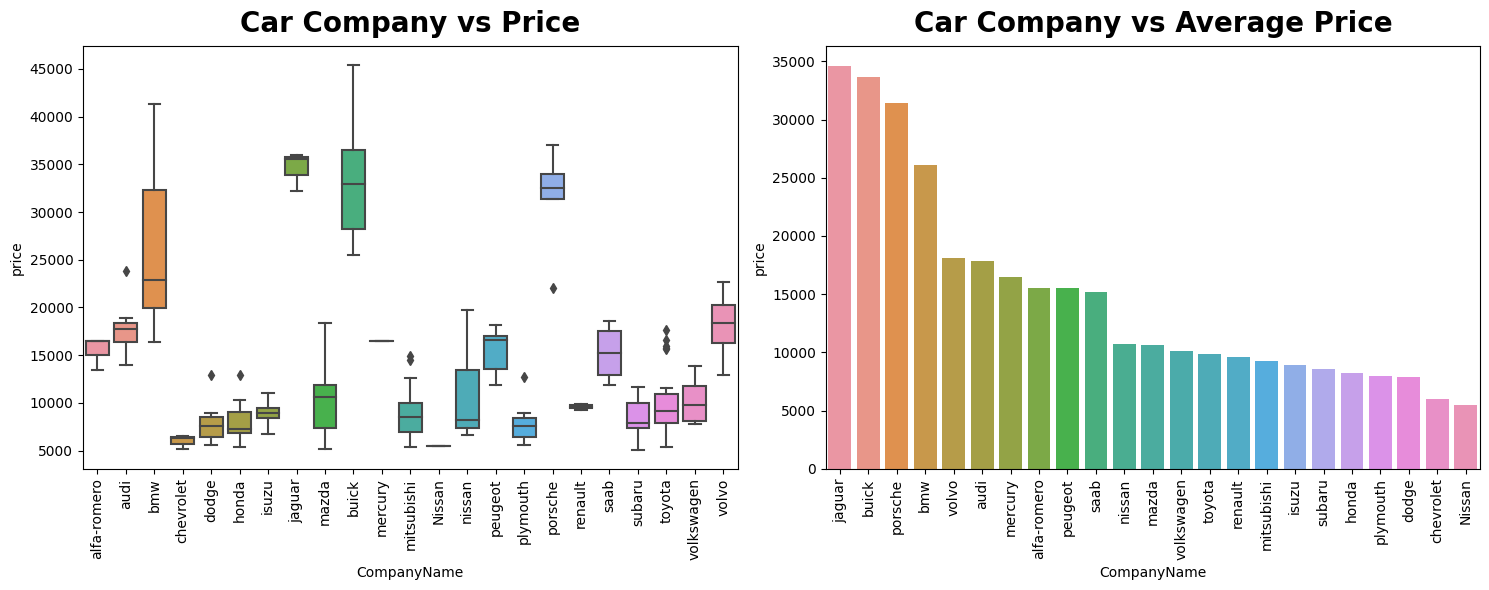

In [228]:
#Draw a boxplot and bar graph based on Company name and Avg. Price in x and y axis respectively
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(x="CompanyName",y="price",data=df)
plt.xticks(rotation=90)
plt.title("Car Company vs Price", pad=10, fontweight="black", fontsize=20)

plt.subplot(1,2,2)
x = pd.DataFrame(df.groupby("CompanyName")["price"].mean().sort_values(ascending=False))
sns.barplot(x=x.index,y="price",data=x) 
plt.xticks(rotation=90)
plt.title("Car Company vs Average Price", pad=10, fontweight="black", fontsize=20)
plt.tight_layout()
plt.show()



Insights

    Jaguar & buick seems to have the highest price range cars.
    Car companies like Nisaan,Renault & Mercury are having only one to two datapoints.
    So we can't make any inference related to lowest price range car companies.

Note

    Since there are too many categories in car compnay feature. So we can derive a new feature Company Price Range which will show the price range as Low Range, Medium Range, High Range.



## Feature Engineering

Based on our exploratory data analysis, we will perform feature engineering to create new variables that may be useful in predicting car prices. This can include combining existing variables, creating interaction terms, and transforming variables to better capture their relationship with the target variable.

In [229]:
# Deriving New Features From "Company Name" Feature.
# As we made an insight above that we can split the car company name into different price ranges.Like Low Range, Medium Range, High Range cars.
z = round(df.groupby(["CompanyName"])["price"].agg(["mean"]),2).T
z

CompanyName,Nissan,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
mean,5499.00,15498.33,17859.17,26118.75,33647.00,6007.00,7875.44,8184.69,8916.50,34600.00,...,10704.88,15489.09,7963.43,31400.50,9595.00,15223.33,8541.25,9885.81,10077.50,18063.18


In [230]:
df = df.merge(z.T,how="left",on="CompanyName")
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
df['CarsRange'] = pd.cut(df['mean'],bins,right=False,labels=cars_bin)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mean,CarsRange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,3.47,2.68,9.00,111,5000,21,27,13495.00,15498.33,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,3.47,2.68,9.00,111,5000,21,27,16500.00,15498.33,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.50,...,2.68,3.47,9.00,154,5000,19,26,16500.00,15498.33,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.80,...,3.19,3.40,10.00,102,5500,24,30,13950.00,17859.17,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.40,...,3.19,3.40,8.00,115,5500,18,22,17450.00,17859.17,Medium


## Data Preprocessing

Data preprocessing involves preparing the data for analysis by cleaning, transforming, and normalizing it. This can involve steps such as removing missing values, scaling numerical variables, encoding categorical variables, and splitting the data into training and testing sets. 

In [231]:
# Creating new DataFrame with all the useful Features.

new_df = df[['fueltype','aspiration','doornumber','carbody','drivewheel','enginetype','cylindernumber','fuelsystem'
             ,'wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg',
             'price','CarsRange']]

In [232]:
new_df.head()


,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,CarsRange
0,gas,std,two,convertible,rwd,dohc,four,mpfi,88.60,168.80,64.10,2548,130,3.47,111,21,27,13495.00,Medium
1,gas,std,two,convertible,rwd,dohc,four,mpfi,88.60,168.80,64.10,2548,130,3.47,111,21,27,16500.00,Medium
2,gas,std,two,hatchback,rwd,ohcv,six,mpfi,94.50,171.20,65.50,2823,152,2.68,154,19,26,16500.00,Medium
3,gas,std,four,sedan,fwd,ohc,four,mpfi,99.80,176.60,66.20,2337,109,3.19,102,24,30,13950.00,Medium
4,gas,std,four,sedan,4wd,ohc,five,mpfi,99.40,176.60,66.40,2824,136,3.19,115,18,22,17450.00,Medium


In [233]:
new_df = pd.get_dummies(columns=["fueltype","aspiration","doornumber","carbody","drivewheel","enginetype",
                                "cylindernumber","fuelsystem","CarsRange"],data=new_df)

In [234]:
new_df.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarsRange_Budget,CarsRange_Medium,CarsRange_Highend
0,88.60,168.80,64.10,2548,130,3.47,111,21,27,13495.00,...,False,False,False,False,True,False,False,False,True,False
1,88.60,168.80,64.10,2548,130,3.47,111,21,27,16500.00,...,False,False,False,False,True,False,False,False,True,False
2,94.50,171.20,65.50,2823,152,2.68,154,19,26,16500.00,...,False,False,False,False,True,False,False,False,True,False
3,99.80,176.60,66.20,2337,109,3.19,102,24,30,13950.00,...,False,False,False,False,True,False,False,False,True,False
4,99.40,176.60,66.40,2824,136,3.19,115,18,22,17450.00,...,False,False,False,False,True,False,False,False,True,False


In [235]:
%pip install scikit-learn
from sklearn.preprocessing import StandardScaler
# Feature Scaling of Numerical Data
scaler = StandardScaler()

Note: you may need to restart the kernel to use updated packages.


In [236]:
num_cols = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower',
            'citympg','highwaympg']
#Fit and transform the data on the numerical columns to scale the data and 


In [237]:
new_df.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarsRange_Budget,CarsRange_Medium,CarsRange_Highend
0,88.60,168.80,64.10,2548,130,3.47,111,21,27,13495.00,...,False,False,False,False,True,False,False,False,True,False
1,88.60,168.80,64.10,2548,130,3.47,111,21,27,16500.00,...,False,False,False,False,True,False,False,False,True,False
2,94.50,171.20,65.50,2823,152,2.68,154,19,26,16500.00,...,False,False,False,False,True,False,False,False,True,False
3,99.80,176.60,66.20,2337,109,3.19,102,24,30,13950.00,...,False,False,False,False,True,False,False,False,True,False
4,99.40,176.60,66.40,2824,136,3.19,115,18,22,17450.00,...,False,False,False,False,True,False,False,False,True,False


In [238]:
# Selecting Features & Labels for Model Training & Testing
x = new_df.drop(columns=["price"])
y = new_df["price"]

In [239]:
x.shape,y.shape

((205, 48), (205,))

In [240]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [241]:
print("x_train - >  ",x_train.shape)
print("x_test - >  ",x_test.shape)
print("y_train - >  ",y_train.shape)
print("y_test - >  ",y_test.shape)

x_train - >   (164, 48)
x_test - >   (41, 48)
y_train - >   (164,)
y_test - >   (41,)


## Machine Learning Modeling

Finally, we will build a machine learning model to predict car prices. We will use a variety of models, such as linear regression, decision trees, and random forests, and evaluate their performance using metrics such as mean squared error and R-squared.

In [242]:
training_score = []
testing_score = []

In [243]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = r2_score(y_train,x_train_pred)*100
    b = r2_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)

In [244]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model_prediction(LinearRegression())

r2_Score of LinearRegression() model on Training Data is: 96.0384799952984
r2_Score of LinearRegression() model on Testing Data is: 88.4054086081392


In [245]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
model_prediction(DecisionTreeRegressor())

r2_Score of DecisionTreeRegressor() model on Training Data is: 99.86537119069865
r2_Score of DecisionTreeRegressor() model on Testing Data is: 91.3315575212839


In [246]:
model_prediction(RandomForestRegressor())

r2_Score of RandomForestRegressor() model on Training Data is: 98.62377451807778
r2_Score of RandomForestRegressor() model on Testing Data is: 95.6632624083381


In [247]:
models = ["Linear Regression","Decision Tree","Random Forest"]

In [248]:
df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score})
df

,Algorithms,Training Score,Testing Score
0,Linear Regression,96.04,88.41
1,Decision Tree,99.87,91.33
2,Random Forest,98.62,95.66
